<img src="https://user-images.strikinglycdn.com/res/hrscywv4p/image/upload/c_limit,fl_lossy,h_300,w_300,f_auto,q_auto/1266110/Logo_wzxi0f.png" style="float: left; margin: 20px; height: 55px">

# Day 15 - Exercises Solutions

### 1)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [1]:
from Resources.Think_Stats.Thinkstats2 import nsfg
from Resources.Think_Stats.Thinkstats2 import thinkstats2
from Resources.Think_Stats.Thinkstats2 import thinkplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def prob_mass(list_):
    dict_ = {}
    for value in list_:   
            dict_[value] = dict_.get(value, 0) + 1
    for key in dict_:
        dict_[key] /= len(list_) 
    return dict_

def plotter(dict_input):
    list_dictval = list(dict_input.values())
    list_dictkey = list(dict_input.keys())
    plt.bar(list_dictkey, list_dictval)
    return plt.show()

def jmean(dict_):
    sm = 0
    for key in dict_:
        sm += key * dict_[key]
    return sm/sum(dict_.values())

In [3]:
resp = nsfg.ReadFemResp(dct_file='Resources/Think_Stats/Thinkstats2/2002FemResp.dct',
                      dat_file='Resources/Think_Stats/Thinkstats2/2002FemResp.dat.gz')

In [4]:
num_under18 = resp['numkdhh'].values

pmf_under18 = thinkstats2.Pmf(num_under18)

In [5]:
pmf_under18

Pmf({3: 0.08713855815779145, 0: 0.466178202276593, 2: 0.19625801386889966, 1: 0.21405207379301322, 4: 0.025644380478869556, 5: 0.01072877142483318})

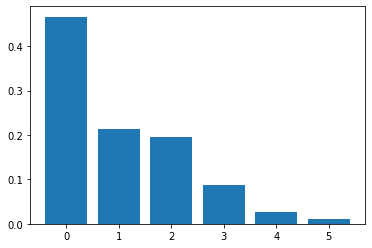

1.024205155043831

In [6]:
pmf_under_18 = prob_mass(num_under18)

plotter(pmf_under_18)
jmean(pmf_under_18)

In [7]:
pmf_under_18

{3: 0.08713855815779144,
 0: 0.46617820227659296,
 2: 0.19625801386889966,
 1: 0.21405207379301322,
 4: 0.025644380478869553,
 5: 0.01072877142483318}

In [8]:
new_under18 = pmf_under18.Copy()

for x, p in pmf_under18.Items():
    new_under18.Mult(x, x)
new_under18

Pmf({3: 0.2614156744733743, 0: 0.0, 2: 0.3925160277377993, 1: 0.21405207379301322, 4: 0.10257752191547823, 5: 0.0536438571241659})

In [9]:
new_under18.Normalize()
new_under18

Pmf({3: 0.25523760858456823, 0: 0.0, 2: 0.38323965252938175, 1: 0.20899335717935616, 4: 0.10015329586101177, 5: 0.052376085845682166})

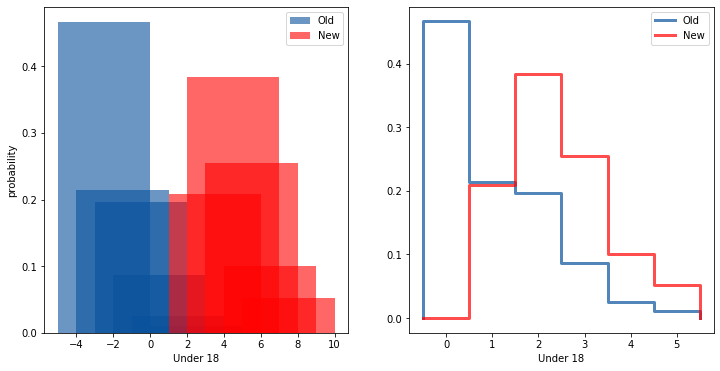

<Figure size 576x432 with 0 Axes>

In [10]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_under18, align='right', width=5, label='Old')
thinkplot.Hist(new_under18, align='left', width=5, label='New', color='red')
thinkplot.Config(xlabel='Under 18',
                ylabel='probability')
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf_under18, label='Old')
thinkplot.Pmf(new_under18, label='New', color='red')
plt.legend()
thinkplot.Show(xlabel='Under 18')

### 2)

So far we computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean, but the process is slightly different:<br>
![alt text](Resources/Think_Stats/notebookpics/pmfmean.png "Title")<br>
where the x i are the unique values in the PMF and pi = PMF(xi). Similarly, you can compute variance like this:<br>
![alt text](Resources/Think_Stats/notebookpics/pmfvar.png "Title")<br>
Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [11]:
def PmfMean(input_):
    pass

In [12]:
PmfMean(pmf_under18)

In [13]:
def PmfVar(input_):
    pass

In [14]:
PmfVar(pmf_under18)

Compare the results with the np.mean and np.var functions to make sure it works

In [15]:
# np.mean(resp['numkdhh'].values)

In [16]:
# np.var(resp['numkdhh'].values)

### 3)

I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [17]:
from Resources.Think_Stats.Thinkstats2 import first
import numpy as np

In [18]:
preg = nsfg.ReadFemPreg(dct_file='Resources/Think_Stats/Thinkstats2/2002FemPreg.dct',
                      dat_file='Resources/Think_Stats/Thinkstats2/2002FemPreg.dat.gz',
                       clean = True)

In [19]:
live, firsts, others = first.MakeFrames()

In [20]:
preg_map = nsfg.MakePregMap(live)
# preg_map

In [21]:
hist = thinkstats2.Hist()

for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        pair = preg.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        hist[diff] += 1

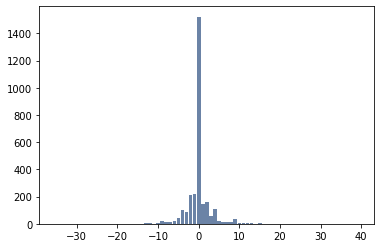

In [22]:
thinkplot.Hist(hist)

In [23]:
pmf = thinkstats2.Pmf(hist)
pmf.Mean()

-0.056367432150313125

In [24]:
pmf

Pmf({0: 0.5295755045233125, 2: 0.055323590814196244, -4: 0.03444676409185804, -2: 0.07480862908837857, -5: 0.013917884481558803, 1: 0.05149617258176757, -3: 0.029923451635351428, 4: 0.03688239387613083, -1: 0.07689631176061239, 16: 0.0003479471120389701, -6: 0.007306889352818372, 7: 0.004523312456506611, 6: 0.0055671537926235215, 3: 0.019485038274182326, 10: 0.0027835768963117608, -9: 0.008350730688935283, -25: 0.0003479471120389701, 13: 0.0024356297842727907, -7: 0.003479471120389701, 5: 0.008350730688935283, -8: 0.003479471120389701, 9: 0.011134307585247043, -10: 0.0020876826722338207, 8: 0.004523312456506611, -15: 0.0006958942240779402, -11: 0.0003479471120389701, 12: 0.0020876826722338207, 11: 0.0024356297842727907, -13: 0.0020876826722338207, -35: 0.0003479471120389701, -12: 0.0010438413361169103, 39: 0.0003479471120389701, 15: 0.0010438413361169103, -17: 0.0006958942240779402, 14: 0.0003479471120389701, -19: 0.0003479471120389701, -14: 0.0006958942240779402})

### 4)

In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [25]:
from Resources.Think_Stats.Thinkstats2 import relay

In [26]:
results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

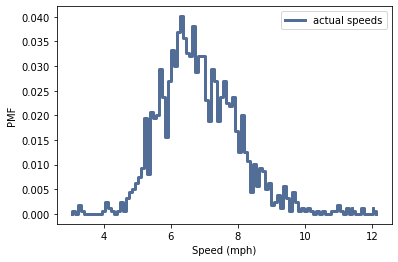

In [27]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [28]:
def ObservedPmf(pmf, speed, label=None):
    """Returns a new Pmf representing speeds observed at a given speed.

    The chance of observing a runner is proportional to the difference
    in speed.

    Args:
        pmf: distribution of actual speeds
        speed: speed of the observing runner
        label: string label for the new dist

    Returns:
        Pmf object
    """
    new = pmf.Copy(label=label)
    for val in new.Values():
        diff = abs(val - speed)
        new[val] *= diff
    new.Normalize()
    return new

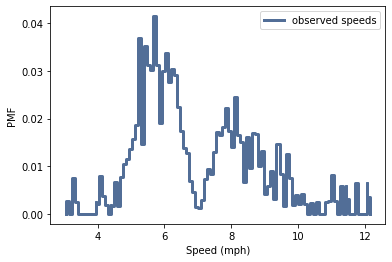

In [29]:
biased = ObservedPmf(pmf, 7, label='observed speeds')
thinkplot.Pmf(biased)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

**Javier Fernández Suárez**